In [28]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN


In [29]:
# Load the dataset
data = pd.read_csv(r"C:\Users\csaru\Downloads\Wine_clust .csv")


In [30]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)


Missing values:
 Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64


In [31]:
# Check for outliers
# Calculate the IQR for each column
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data < lower_bound) | (data > upper_bound)]

# Show the results
print("Outliers:\n", outliers)

Outliers:
      Alcohol  Malic_Acid  Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0        NaN         NaN  NaN           NaN        NaN            NaN   
1        NaN         NaN  NaN           NaN        NaN            NaN   
2        NaN         NaN  NaN           NaN        NaN            NaN   
3        NaN         NaN  NaN           NaN        NaN            NaN   
4        NaN         NaN  NaN           NaN        NaN            NaN   
..       ...         ...  ...           ...        ...            ...   
173      NaN        5.65  NaN           NaN        NaN            NaN   
174      NaN         NaN  NaN           NaN        NaN            NaN   
175      NaN         NaN  NaN           NaN        NaN            NaN   
176      NaN         NaN  NaN           NaN        NaN            NaN   
177      NaN         NaN  NaN           NaN        NaN            NaN   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  Hue  \
0           NaN                 

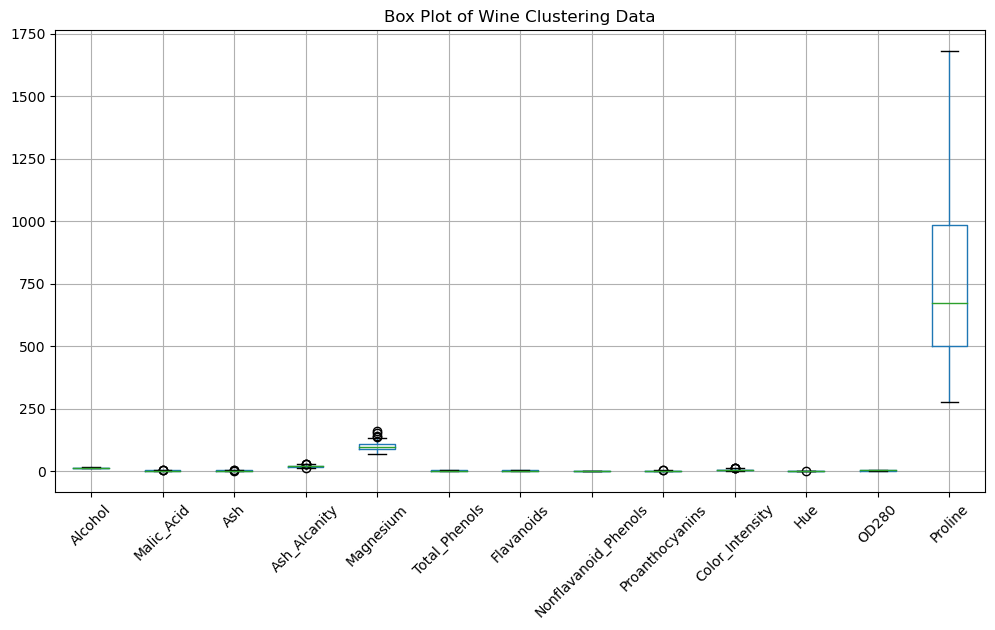

In [32]:
import matplotlib.pyplot as plt


# Create box plots for each column
plt.figure(figsize=(12, 6))
data.boxplot()
plt.title("Box Plot of Wine Clustering Data")
plt.xticks(rotation=45)
plt.show()

In [33]:
from sklearn.preprocessing import StandardScaler

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

          Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000      

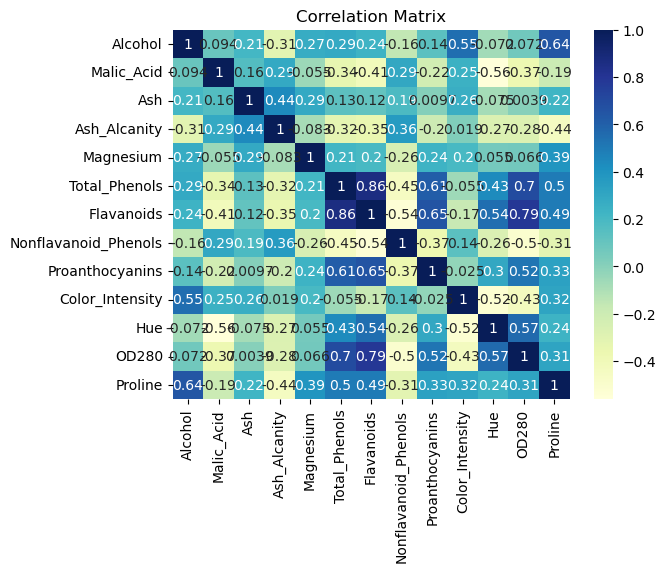

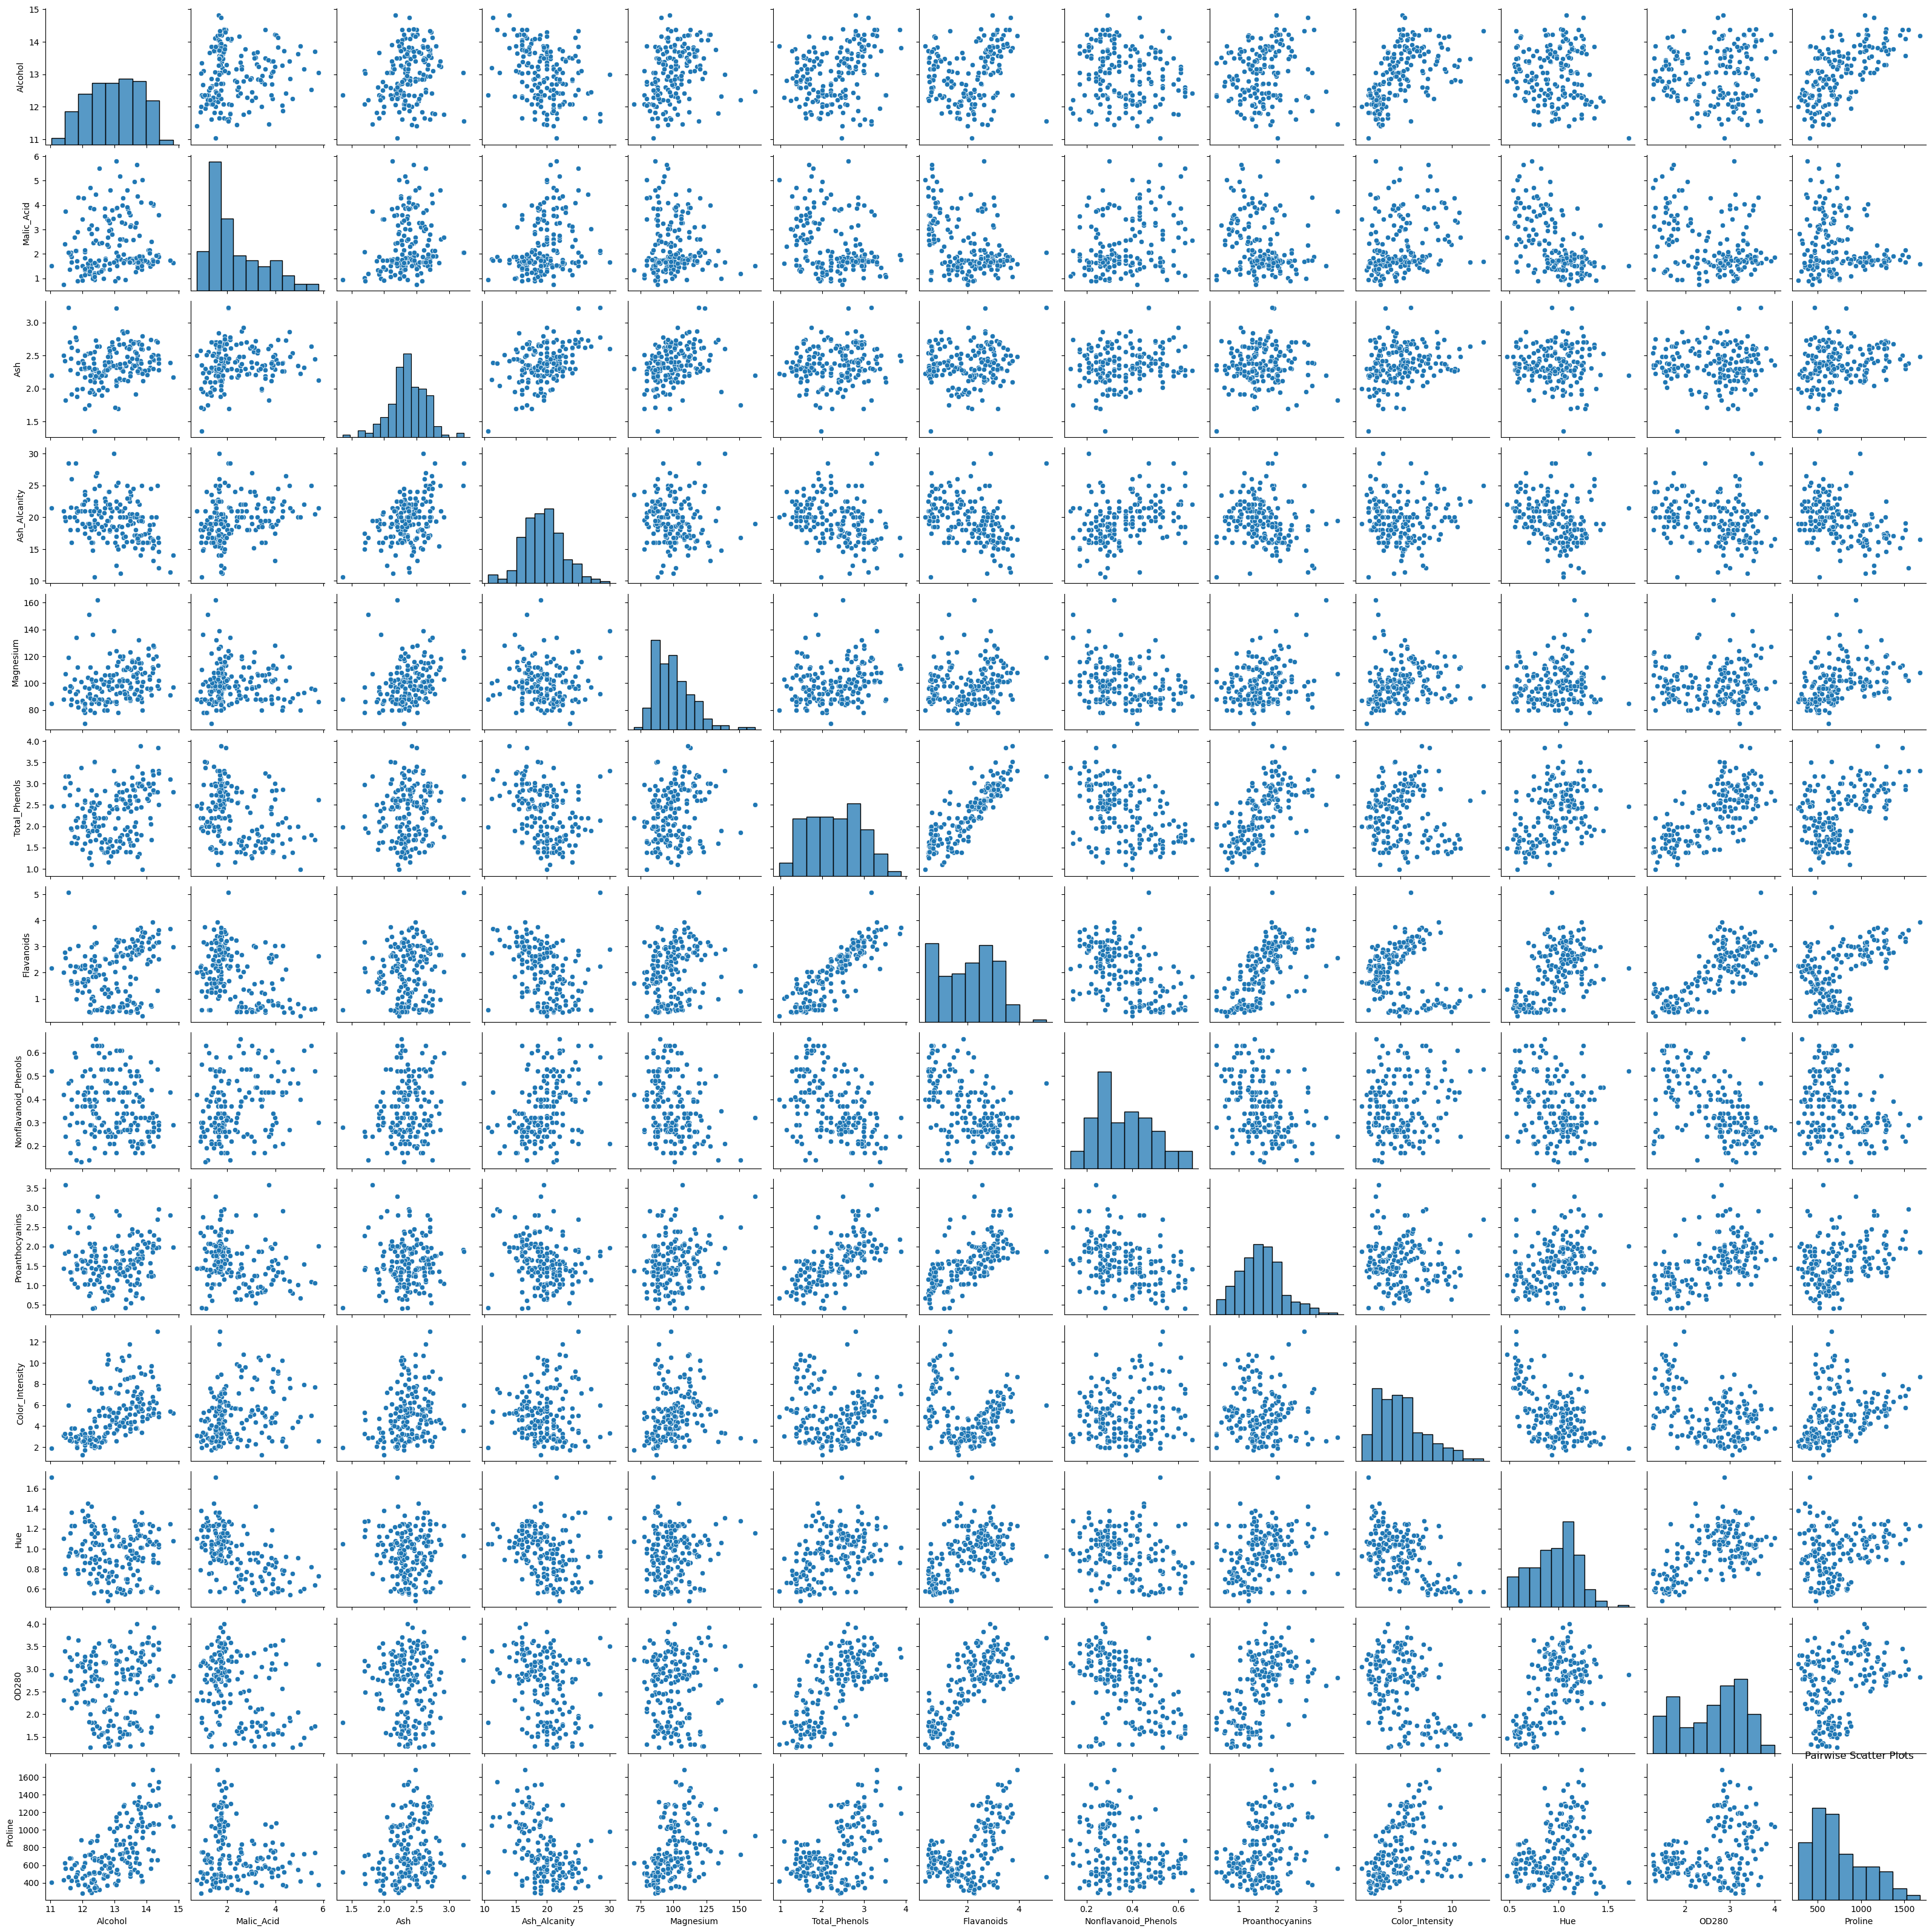

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Basic statistics
print(data.describe())  # Display basic statistics like mean, min, max, etc.

# Correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()

# Pairwise scatter plots
sns.pairplot(data)
plt.title("Pairwise Scatter Plots")
plt.show()

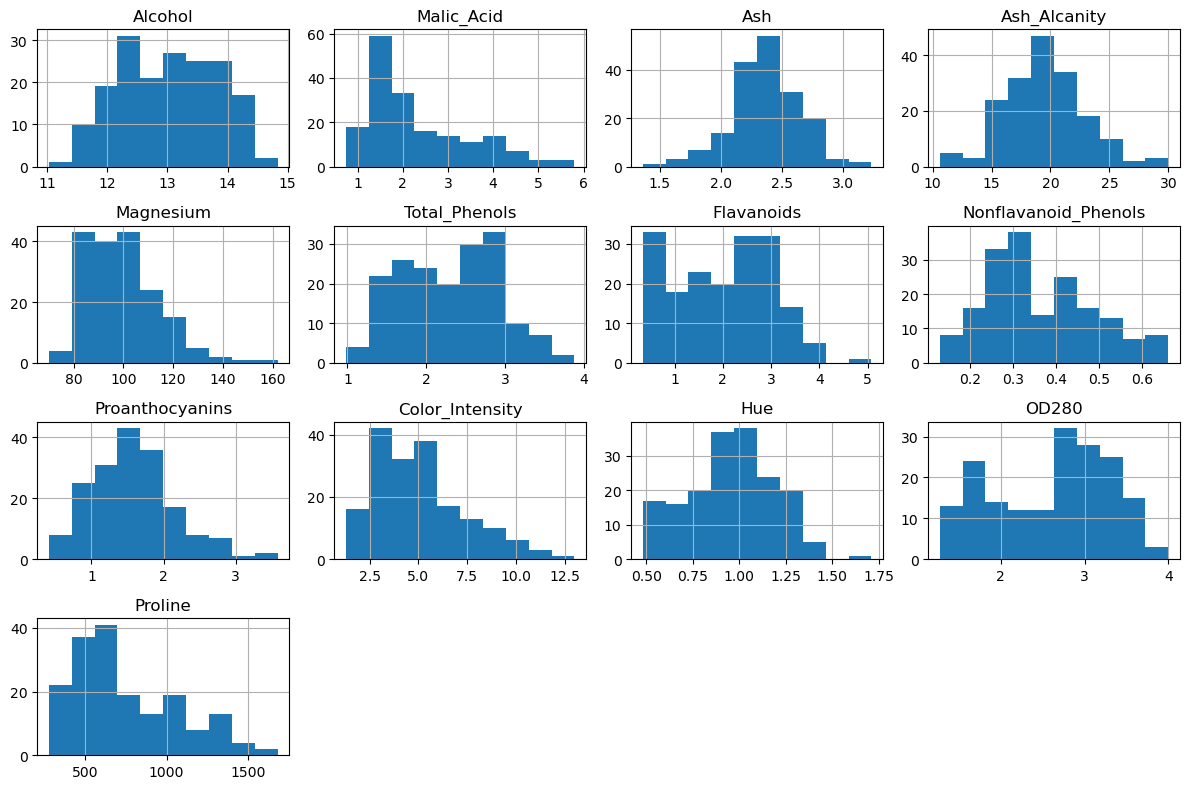

In [35]:
# Plot histograms for each column
data.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

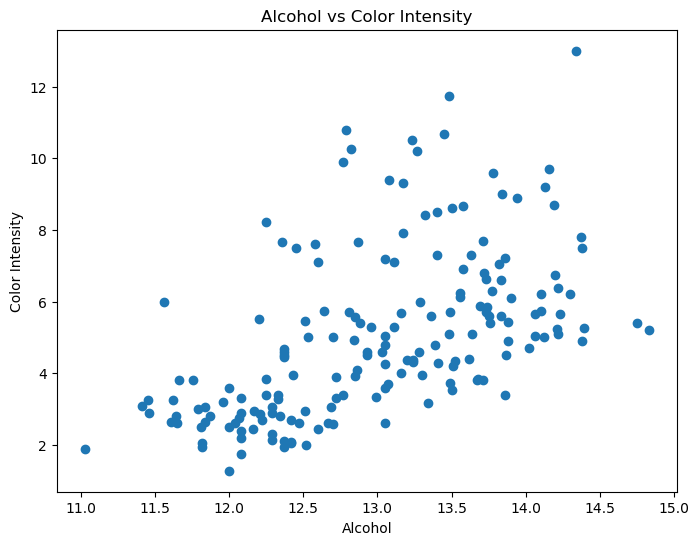

In [36]:
# Plot scatter plots for selected variables
plt.figure(figsize=(8, 6))
plt.scatter(data['Alcohol'], data['Color_Intensity'])
plt.title('Alcohol vs Color Intensity')
plt.xlabel('Alcohol')
plt.ylabel('Color Intensity')
plt.show()

In [37]:
# Step 3: Data Preprocessing
X = data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [38]:
# Step 5: K-means Clustering
silhouette_scores = []
inertia_scores = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    inertia_scores.append(kmeans.inertia_)
    print(f"K-means Clustering with k={k}: Silhouette Score = {score}")



K-means Clustering with k=2: Silhouette Score = 0.26831340971052126
K-means Clustering with k=3: Silhouette Score = 0.2848589191898987
K-means Clustering with k=4: Silhouette Score = 0.25173343011696475
K-means Clustering with k=5: Silhouette Score = 0.2271732547624458
K-means Clustering with k=6: Silhouette Score = 0.19582485390848947
K-means Clustering with k=7: Silhouette Score = 0.20913005310687274
K-means Clustering with k=8: Silhouette Score = 0.13581656516941268
K-means Clustering with k=9: Silhouette Score = 0.14576057110571292
K-means Clustering with k=10: Silhouette Score = 0.13394527355239233


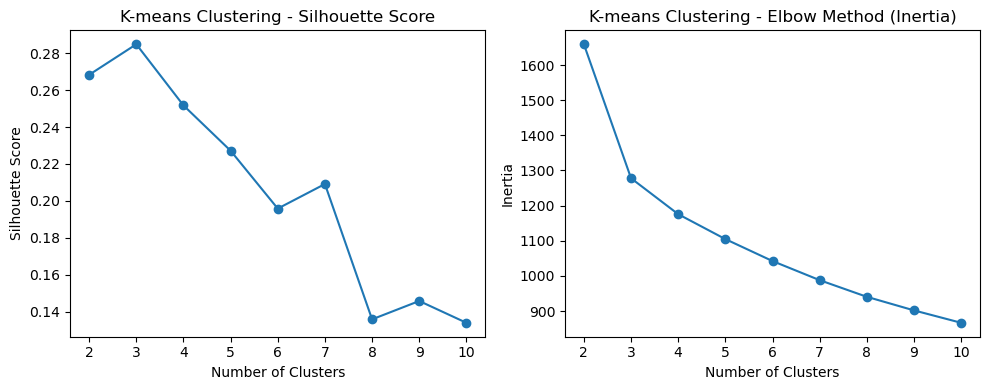

Optimal number of clusters (Silhouette Score): 3
Optimal number of clusters (Elbow Method): 10


In [39]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("K-means Clustering - Silhouette Score")

plt.subplot(1, 2, 2)
plt.plot(k_values, inertia_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("K-means Clustering - Elbow Method (Inertia)")

plt.tight_layout()
plt.show()

optimal_k_silhouette = k_values[np.argmax(silhouette_scores)]
optimal_k_elbow = k_values[np.argmin(inertia_scores)]
print(f"Optimal number of clusters (Silhouette Score): {optimal_k_silhouette}")
print(f"Optimal number of clusters (Elbow Method): {optimal_k_elbow}")

kmeans_silhouette = KMeans(n_clusters=optimal_k_silhouette, random_state=42)
kmeans_silhouette.fit(X_scaled)
kmeans_silhouette_labels = kmeans_silhouette.labels_

kmeans_elbow = KMeans(n_clusters=optimal_k_elbow, random_state=42)
kmeans_elbow.fit(X_scaled)
kmeans_elbow_labels = kmeans_elbow.labels_

In [42]:
silhouette_scores_hac = []
n_clusters_range = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']

for linkage in linkage_methods:
    for n_clusters in n_clusters_range:
        hac = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        hac.fit(X_scaled)
        labels = hac.labels_
        score = silhouette_score(X_scaled, labels)
        silhouette_scores_hac.append(score)
        print(f"Hierarchical Agglomerative Clustering with linkage='{linkage}' and n_clusters={n_clusters}: Silhouette Score = {score}")



Hierarchical Agglomerative Clustering with linkage='ward' and n_clusters=2: Silhouette Score = 0.2670131771272231
Hierarchical Agglomerative Clustering with linkage='ward' and n_clusters=3: Silhouette Score = 0.2774439826952265
Hierarchical Agglomerative Clustering with linkage='ward' and n_clusters=4: Silhouette Score = 0.225836659334758
Hierarchical Agglomerative Clustering with linkage='ward' and n_clusters=5: Silhouette Score = 0.18674235566758707
Hierarchical Agglomerative Clustering with linkage='ward' and n_clusters=6: Silhouette Score = 0.17966642854438503
Hierarchical Agglomerative Clustering with linkage='ward' and n_clusters=7: Silhouette Score = 0.18685342560226942
Hierarchical Agglomerative Clustering with linkage='ward' and n_clusters=8: Silhouette Score = 0.18834697102837825
Hierarchical Agglomerative Clustering with linkage='ward' and n_clusters=9: Silhouette Score = 0.1917169293227209
Hierarchical Agglomerative Clustering with linkage='ward' and n_clusters=10: Silhouet

In [43]:
# Reshape silhouette scores into a 2D array
silhouette_scores_hac = np.array(silhouette_scores_hac).reshape(len(linkage_methods), len(n_clusters_range))



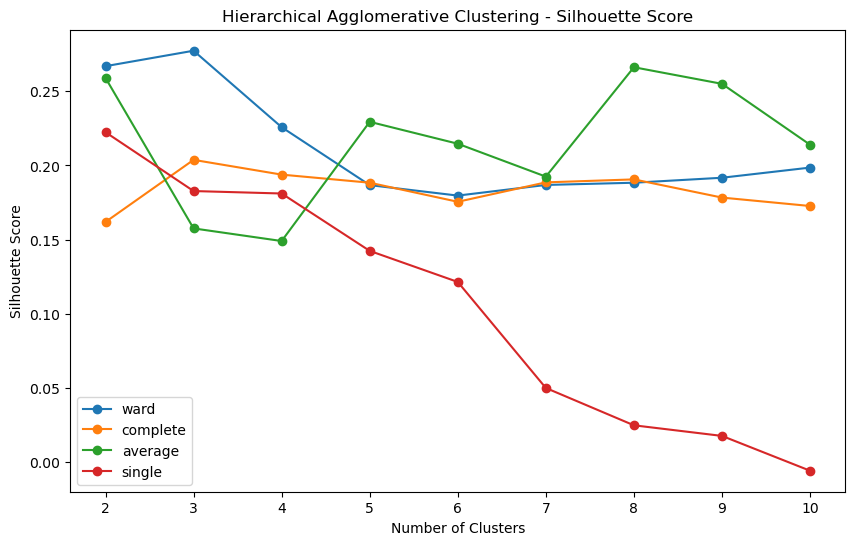

In [44]:
# Plotting silhouette scores
plt.figure(figsize=(10, 6))
for i, linkage in enumerate(linkage_methods):
    plt.plot(n_clusters_range, silhouette_scores_hac[i], marker='o', label=linkage)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Hierarchical Agglomerative Clustering - Silhouette Score")
plt.legend()
plt.show()




In [45]:
# Finding optimal linkage method and number of clusters
optimal_linkage_idx, optimal_n_clusters_idx = np.unravel_index(np.argmax(silhouette_scores_hac), silhouette_scores_hac.shape)
optimal_linkage = linkage_methods[optimal_linkage_idx]
optimal_n_clusters = n_clusters_range[optimal_n_clusters_idx]
print(f"Optimal linkage method: {optimal_linkage}")
print(f"Optimal number of clusters: {optimal_n_clusters}")



Optimal linkage method: ward
Optimal number of clusters: 3


In [47]:
# Performing Hierarchical Agglomerative Clustering with optimal parameters
hac = AgglomerativeClustering(n_clusters=optimal_n_clusters, linkage=optimal_linkage)
hac.fit(X_scaled)
hac_labels = hac.labels_

# Displaying the cluster labels
print("Hierarchical Agglomerative Clustering - Cluster Labels:")
print(hac_labels)

Hierarchical Agglomerative Clustering - Cluster Labels:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 1 0 0 0 2 2 0 1 0 1 2 0 2
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [63]:
# Parameter search for DBSCAN
eps_values = np.arange(0.1, 1.0, 0.1)
min_samples_values = range(2, 10)
best_silhouette_score = -1
best_eps = None
best_min_samples = None

In [64]:
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(X_scaled)
        dbscan_labels = dbscan.labels_
        num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)  # Subtracting 1 if noise points are present
        if num_clusters > 1:
            silhouette = silhouette_score(X_scaled, dbscan_labels)
            if silhouette > best_silhouette_score:
                best_silhouette_score = silhouette
                best_eps = eps
                best_min_samples = min_samples

In [65]:
# Check if valid combination of parameters was found
if best_silhouette_score == -1:
    print("No valid combination of parameters found for DBSCAN.")
else:
    # Perform DBSCAN with optimal parameters
    dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
    dbscan.fit(X_scaled)
    dbscan_labels = dbscan.labels

No valid combination of parameters found for DBSCAN.


In [68]:
from sklearn.cluster import DBSCAN

# Parameter tuning
eps_values = [0.1, 0.5, 1.0, 1.5]  # Adjust these values accordingly
min_samples_values = [5, 10, 15, 20]  # Adjust these values accordingly

best_dbscan_silhouette = -1
best_dbscan_labels = None
best_eps = None
best_min_samples = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(X_scaled)

        num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)  # Counting the number of clusters
        if num_clusters > 1:
            dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)
            print(f"DBSCAN Clustering with eps={eps}, min_samples={min_samples}: Silhouette Score = {dbscan_silhouette}")

            if dbscan_silhouette > best_dbscan_silhouette:
                best_dbscan_silhouette = dbscan_silhouette
                best_dbscan_labels = dbscan_labels
                best_eps = eps
                best_min_samples = min_samples

print(f"Best DBSCAN Clustering - Silhouette Score: {best_dbscan_silhouette}")
print(f"Best DBSCAN Clustering - eps: {best_eps}")
print(f"Best DBSCAN Clustering - min_samples: {best_min_samples}")
print("Best DBSCAN Clustering - Cluster Labels:")
print(best_dbscan_labels)


Best DBSCAN Clustering - Silhouette Score: -1
Best DBSCAN Clustering - eps: None
Best DBSCAN Clustering - min_samples: None
Best DBSCAN Clustering - Cluster Labels:
None


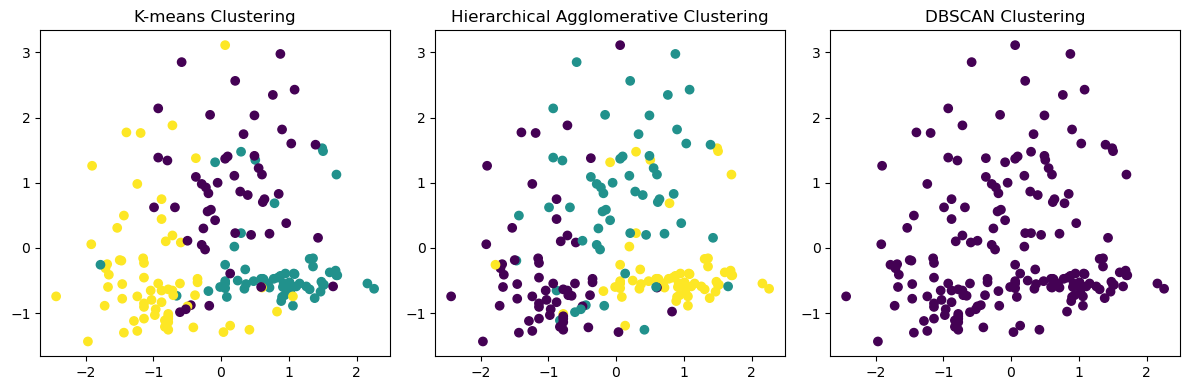

In [70]:
    # Compare All Three Clustering Models
    plt.figure(figsize=(12, 4))

    # K-means Clustering
    plt.subplot(1, 3, 1)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
    plt.title("K-means Clustering")

    # Hierarchical Agglomerative Clustering
    plt.subplot(1, 3, 2)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=hac_labels, cmap='viridis')
    plt.title("Hierarchical Agglomerative Clustering")

    # DBSCAN Clustering
    plt.subplot(1, 3, 3)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis')
    plt.title("DBSCAN Clustering")

    plt.tight_layout()
    plt.show()